PCA 主成分分析，iris 数据降维后分类

1、基于iris data.csv数据，建立KNN模型实现数据分类(n neighbors=3)
对数据进行标准化处理，选取一个维度可视化处理后的效果
3、进行与原数据等维度PCA，查看各主成分的方差比例
4、保留合适的主成分，可视化降维后的数据
5、基于降维后数据建立KNN模型，与原数据表现进行对比

In [17]:
import pandas as pd 
import numpy as np

data = pd.read_csv('iris.csv')
data.head()
x = data.drop(['variety'], axis=1)
y = data.loc[:, 'variety']
y.head()
#print(x.shape, y.shape)

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [4]:
#establish knn model 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x, y)

y_predict = KNN.predict(x)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.96


In [ ]:
#数据标准化处理, 目的是为了使新数据均值为0，标准差为1
from sklearn.preprocessing import StandardScaler
x_norm = StandardScaler().fit_transform(x)
print(x_norm)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

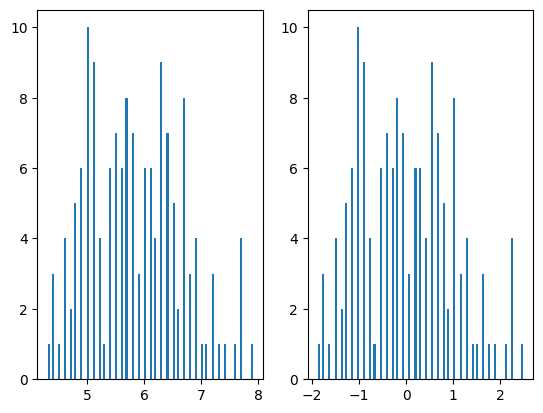

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.subplot(121)
plt.hist(x.loc[:, 'sepal.length'], bins=100)
plt.subplot(122)
plt.hist(x_norm[:, 0], bins=100)
plt.show()

In [ ]:
x1_mean = x.loc[:, 'sepal.length'].mean()
x1_norm_mean = x_norm[:, 0].mean()

x1_std = x.loc[:, 'sepal.length'].std()
x1_norm_std = x_norm[:, 0].std()
#标准化后，均值为接近0， 方差为1
print(x1_mean, x1_norm_mean, x1_std, x1_norm_std)


5.843333333333334 -4.736951571734001e-16 0.828066127977863 1.0


In [11]:
print(x.shape)

(150, 4)


In [ ]:
#PCA analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
#注意参数是标准化的x，而不是原始x
x_pca = pca.fit_transform(x_norm)

#查看各个主成分方差
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

#结果表明第一个和第二个方差较大，所以保留前两个主成分

[0.72962445 0.22850762 0.03668922 0.00517871]


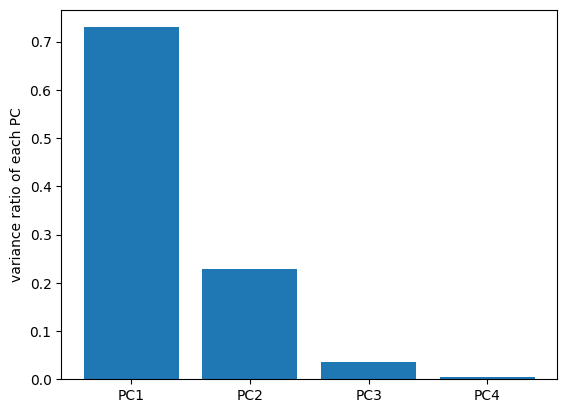

In [14]:
fig2 = plt.figure()
plt.bar([1,2,3,4], var_ratio)
plt.xticks([1,2,3,4],['PC1','PC2', 'PC3', 'PC4'])
plt.ylabel('variance ratio of each PC')
plt.show()

In [15]:
#降维处理
pca = PCA(n_components=2)
#注意参数是标准化的x，而不是原始x
x_pca = pca.fit_transform(x_norm)
x_pca.shape

(150, 2)

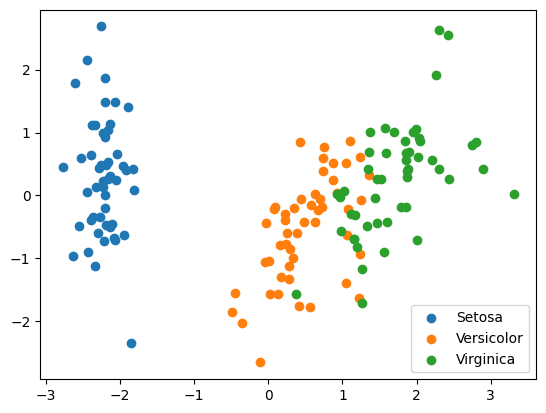

In [19]:
fig3 = plt.figure()
setosa = plt.scatter(x_pca[:,0][y=='Setosa'], x_pca[:,1][y=='Setosa'])
ver = plt.scatter(x_pca[:,0][y=='Versicolor'], x_pca[:,1][y=='Versicolor'])
vir = plt.scatter(x_pca[:,0][y=='Virginica'], x_pca[:,1][y=='Virginica'])
plt.legend((setosa, ver, vir),('Setosa', 'Versicolor', 'Virginica'))
plt.show()

In [20]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_pca, y)

y_predict = KNN.predict(x_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.9466666666666667
